---
# 3.2 Bisection method
---

Suppose $f \in C[a,b]$ and that $f(a)$ and $f(b)$ have opposite signs; i.e.,

$$
f(a) \cdot f(b) < 0.
$$

Recall the following important theorem from calculus.

> ### Intermediate Value Theorem
>
If $f \in C[a,b]$ and $f(a) \leq s \leq f(b)$, then there exists a real number $c \in [a,b]$ such that $f(c) = s$.

Since $f$ changes sign over $[a,b]$, the Intermediate Value Theorem implies that there is some $x^* \in [a,b]$ such that $f(x^*) = 0$.

The **bisection method** searches for a root of $f$ in $[a,b]$ as follows.

1. Let $p = (a+b)/2$ be the **midpoint** of $[a,b]$.
2. If $f(a) \cdot f(p) < 0$, then there is a root in $[a,p]$.
3. If $f(a) \cdot f(p) = 0$, then $p$ is a root.
4. If $f(a) \cdot f(p) > 0$, then there is a root in $[p,b]$.

Each time we apply the above, we get a subinterval that contains a root that is **half the size** of the interval $[a,b]$.

In [1]:
# Code the bisection method
function bisect(f, a, b, tol=1e-8)
    fa, fb = f(a), f(b)
    
    if fa == 0.0
        return a
    elseif fb == 0.0
        return b
    end
        
    if fa*fb > 0
        error("The sign of f(a) and f(b) must be different.")
    end
    
    k = 0
    p = (a + b)/2
    oldp = Inf
    @printf "%4s %12s %12s %12s\n" "k" "a" "p" "b"
    while abs(p - oldp) > tol*(1 + abs(p))
        k += 1
        fp = f(p)
        if fp == 0.0
            return p
        end

        if fa*fp < 0
            b = p
        else
            a = p
        end
        oldp = p
        p = (a + b)/2
        @printf "%4d %12.8f %12.8f %12.8f\n" k a p b
    end
    
    return p
    
end

bisect (generic function with 2 methods)

In [2]:
f(x) = x - 2

f (generic function with 1 method)

In [3]:
bisect(f, 0., 1.)

LoadError: The sign of f(a) and f(b) must be different.

In [4]:
bisect(f, 1., 2.)

2.0

In [5]:
xs = 2.0

rt = bisect(f, 1., 100.)

abs(rt - xs) 

   k            a            p            b
   1   1.00000000  25.75000000  50.50000000
   2   1.00000000  13.37500000  25.75000000
   3   1.00000000   7.18750000  13.37500000
   4   1.00000000   4.09375000   7.18750000
   5   1.00000000   2.54687500   4.09375000
   6   1.00000000   1.77343750   2.54687500
   7   1.77343750   2.16015625   2.54687500
   8   1.77343750   1.96679688   2.16015625
   9   1.96679688   2.06347656   2.16015625
  10   1.96679688   2.01513672   2.06347656
  11   1.96679688   1.99096680   2.01513672
  12   1.99096680   2.00305176   2.01513672
  13   1.99096680   1.99700928   2.00305176
  14   1.99700928   2.00003052   2.00305176
  15   1.99700928   1.99851990   2.00003052
  16   1.99851990   1.99927521   2.00003052
  17   1.99927521   1.99965286   2.00003052
  18   1.99965286   1.99984169   2.00003052
  19   1.99984169   1.99993610   2.00003052
  20   1.99993610   1.99998331   2.00003052
  21   1.99998331   2.00000691   2.00003052
  22   1.99998331   1.99999511  

2.2118911147117615e-8

---

### Example

We will now use the above `bisect` function to find the root of

$$
f(x) = 2 \cosh(x/4) - x
$$

that lies in the interval $[5,10]$.

In [6]:
bisect(x -> 2cosh(x/4) - x, 5., 10.)

   k            a            p            b
   1   7.50000000   8.75000000  10.00000000
   2   7.50000000   8.12500000   8.75000000
   3   8.12500000   8.43750000   8.75000000
   4   8.43750000   8.59375000   8.75000000
   5   8.43750000   8.51562500   8.59375000
   6   8.43750000   8.47656250   8.51562500
   7   8.47656250   8.49609375   8.51562500
   8   8.49609375   8.50585938   8.51562500
   9   8.50585938   8.51074219   8.51562500
  10   8.50585938   8.50830078   8.51074219
  11   8.50585938   8.50708008   8.50830078
  12   8.50708008   8.50769043   8.50830078
  13   8.50708008   8.50738525   8.50769043
  14   8.50708008   8.50723267   8.50738525
  15   8.50708008   8.50715637   8.50723267
  16   8.50715637   8.50719452   8.50723267
  17   8.50719452   8.50721359   8.50723267
  18   8.50719452   8.50720406   8.50721359
  19   8.50719452   8.50719929   8.50720406
  20   8.50719929   8.50720167   8.50720406
  21   8.50719929   8.50720048   8.50720167
  22   8.50719929   8.50719988  

8.507199510931969

---

### Example

Let's try to find the value of $y_0$ such that the solution $y(t)$ of the ordinary differential equation 

$$
\frac{dy}{dt} = t - 5 + \frac{y^2}{100}
$$

with initial value $y(0) = y_0$ satisfies $y(10) = 20$.

In [7]:
using ODE  # Package for solving ordinary differential equations

In [8]:
?ODE

search: ODE ode4 ode78 ode4s ode45 ode23 ode4ms ode23s ODEjlAlgorithm code_llvm



No documentation found.

Displaying the `README.md` for the module instead.

---

Various basic Ordinary Differential Equation solvers implemented in Julia.

[![Join the chat at https://gitter.im/JuliaDiffEq/Lobby](https://badges.gitter.im/JuliaDiffEq/Lobby.svg)](https://gitter.im/JuliaDiffEq/Lobby?utm_source=badge&utm_medium=badge&utm_campaign=pr-badge&utm_content=badge)  [![Travis](https://travis-ci.org/JuliaDiffEq/ODE.jl.svg?branch=master)](https://travis-ci.org/JuliaDiffEq/ODE.jl) [![AppVoyer](https://ci.appveyor.com/api/projects/status/mue0n1yhlxq4ok8d/branch/master?svg=true)](https://ci.appveyor.com/project/ChrisRackauckas/ode-jl/branch/master) [![Coverage Status](https://img.shields.io/coveralls/JuliaDiffEq/ODE.jl.svg)](https://coveralls.io/r/JuliaDiffEq/ODE.jl) [![ODE](http://pkg.julialang.org/badges/ODE_0.4.svg)](http://pkg.julialang.org/?pkg=ODE) [![ODE](http://pkg.julialang.org/badges/ODE_0.5.svg)](http://pkg.julialang.org/?pkg=ODE)

Pull requests are always highly welcome to fix bugs, add solvers, or anything else!

# API discussions

There are currently discussions about how the Julian API for ODE solvers should look like, and the current documentation is more like a wishlist than a documentation. The API has changed considerably since the initial v0.1 release, so be carefull when you upgrade to v0.2 or later versions.

# Current status of the project

The first release, v0.1, contains the basic functionality that was moved here when the package was originally moved from Base. Although quite poorly tested, at least some of the functionality is quite reliable. However, that version is almost entirely undocumented, and will probably stay that way.

Since then, quite a lot has happened in the package, and the best way to use current ODE.jl is by checking out the latest master with `Pkg.checkout("ODE")`. By doing so, you get access to a new, better API – but be careful; several breaking changes have been introduced since v0.1. Therefore, the best way to learn the current API is to read the source. (The documentation in [http://github.com/JuliaDiffEq/ODE.jl/master/blobs/doc/api.md](doc/api.md) is to be regarded as a wishlist, where some but not all of the features have been implemented as of yet).

Currently, `ODE` exports the following adaptive solvers:

  * `ode23`: 2nd order adaptive solver with 3rd order error control, using the Bogacki–Shampine coefficients
  * `ode45`: 4th order adaptive solver with 5th order error control, using the Dormand Prince coefficients. Fehlberg and Cash-Karp coefficients are also available.
  * `ode78`: 7th order adaptive solver with 8th order error control, using the Fehlberg coefficients.
  * `ode23s`: 2nd/3rd order adaptive solver for stiff problems, using a modified Rosenbrock triple.

all of which have the following basic API:

```
tout, yout = odeXX(F, y0, tspan; keywords...)
```

to solve the explicitly defined ODE by dy/dt = F(t,y). A few other solvers are also exported, see the source code for details.

The adaptive solvers accept the following keywords

  * `norm`: user-supplied norm for determining the error `E` (default `Base.vecnorm`),
  * `abstol` and/or `reltol`: an integration step is accepted if `E <= abstol || E <= reltol*abs(y)` (defaults `reltol = 1e-5`, `abstol = 1e-8`),
  * `maxstep`, `minstep` and `initstep`: determine the maximal, minimal and initial integration step (defaults `minstep=|tspan[end] - tspan[1]|/1e9`, `maxstep=|tspan[end] - tspan[1]|/2.5` and automatic initial step estimation).
  * `points=:all` (default): output is given for each value in `tspan` as well as for each intermediate point the solver used.
  * `points=:specified`: output is given only for each value in `tspan`.

Additionally, `ode23s` solver supports

  * `jacobian = G(t,y)`: user-supplied Jacobian G(t,y) = dF(t,y)/dy (default estimate by finite-difference method).

There are also fixed step Runge-Kutta and Rosenbrock solvers available.

# Examples

The examples directory contain a few notebooks that show how to get started. You can also see them here:

  * [Simple differential equation](http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Simple_Differential_Equation.ipynb)
  * [Lorenz Attractor](http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Lorenz_Attractor.ipynb)
  * [Terminal Velocity](http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Terminal_Velocity.ipynb)


In [9]:
F(t, y) = t - 5 + y^2/100

F (generic function with 1 method)

In [13]:
using PyPlot

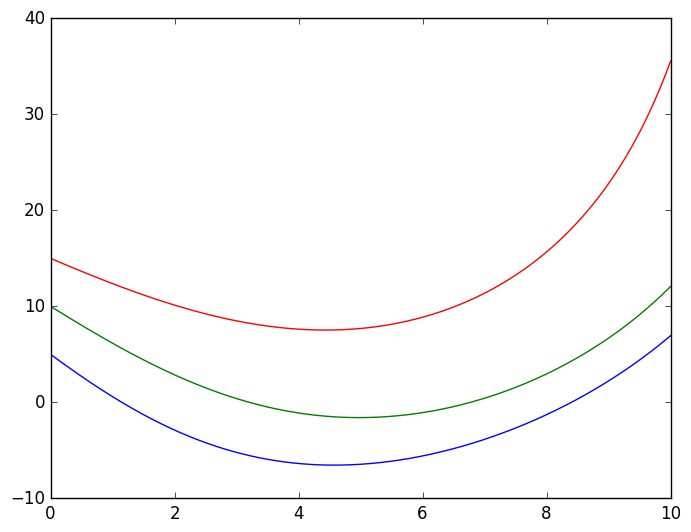

In [16]:
tspan = linspace(0, 10, 1000)

y0 = 5.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

y0 = 10.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

y0 = 15.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

In [30]:
function foo(y0)
    tspan = linspace(0, 10, 100000)
    tout, yout = ode4((t, y) -> t - 5 + y^2/100, y0, tspan)
    return yout[end]
end

foo (generic function with 1 method)

In [31]:
@time foo(5.)

  0.244776 seconds (5.03 M allocations: 119.723 MB, 7.57% gc time)


6.966786049796626

In [21]:
foo(10.)

12.088019887099396

In [22]:
foo(15.)

35.576388340170155

In [32]:
@time y0 = bisect(y0 -> foo(y0) - 20, 10., 15.)

   k            a            p            b
   1  12.50000000  13.75000000  15.00000000
   2  12.50000000  13.12500000  13.75000000
   3  12.50000000  12.81250000  13.12500000
   4  12.81250000  12.96875000  13.12500000
   5  12.81250000  12.89062500  12.96875000
   6  12.89062500  12.92968750  12.96875000
   7  12.92968750  12.94921875  12.96875000
   8  12.92968750  12.93945313  12.94921875
   9  12.92968750  12.93457031  12.93945313
  10  12.92968750  12.93212891  12.93457031
  11  12.93212891  12.93334961  12.93457031
  12  12.93212891  12.93273926  12.93334961
  13  12.93273926  12.93304443  12.93334961
  14  12.93273926  12.93289185  12.93304443
  15  12.93273926  12.93281555  12.93289185
  16  12.93281555  12.93285370  12.93289185
  17  12.93285370  12.93287277  12.93289185
  18  12.93285370  12.93286324  12.93287277
  19  12.93286324  12.93286800  12.93287277
  20  12.93286800  12.93287039  12.93287277
  21  12.93287039  12.93287158  12.93287277
  22  12.93287158  12.93287218  

12.932871654629707

In [25]:
foo(y0)

19.999999717054838

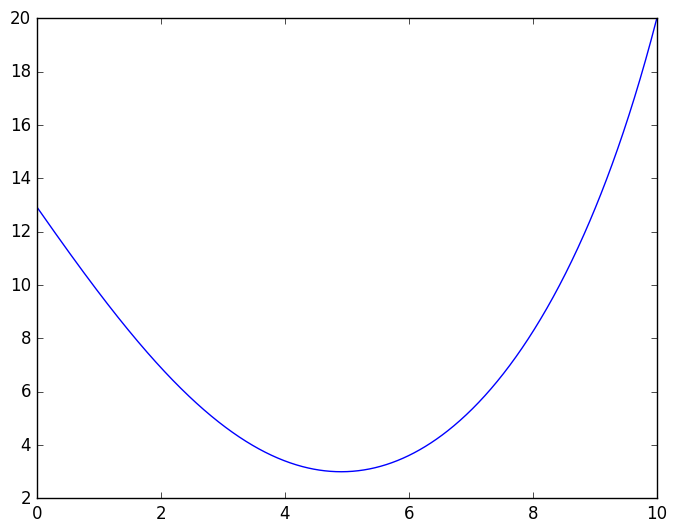

In [26]:
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

---

## Analyzing the bisection method

Initially, we know a root $x^*$ is somewhere in the interval $[a,b]$. If we let $x_k$ be the midpoint of the $k$th subinterval, then

$$\left|x^* - x_0\right| \leq \frac{b-a}{2}.$$

In the next iteration, 

$$\left|x^* - x_1\right| \leq \frac{b-a}{4},$$

and in the following iteration,

$$\left|x^* - x_2\right| \leq \frac{b-a}{8},$$

and so on, each time reducing our error by a factor of $2$.

In general,

$$\left|x^* - x_k\right| \leq \frac{b-a}{2} \cdot 2^{-k}, 
\qquad \text{for $k = 0,1,2,\ldots$}.$$

Suppose we want to compute $x_k$ such that 

$$\left|x^* - x_k\right| \leq \mathtt{atol}.$$

Then we just need to find the smallest positive integer $k$ such that

$$\frac{b-a}{2} \cdot 2^{-k} \leq \mathtt{atol}.$$

That is,

$$\frac{b-a}{2\mathtt{atol}} \leq 2^k,$$

which gives us

$$\log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \leq k,$$

so we just need the first integer $k$ that is larger than $\log_2\left(\frac{b-a}{2\mathtt{atol}}\right)$. Therefore, 

$$k = \left\lceil \log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \right\rceil.$$

In [40]:
atol = 1e-8
a, b = 10., 15.

k = ceil(log2((b - a)/2atol))

28.0

---

## Pros and cons of the bisection method

Pros:

1. **Simple:** The bisection method only requires function values, is easy to understand and implement, and it is easy to analyze.

2. **Robust:** The bisection method is guaranteed to work, provided that $f$ is continuous and changes sign on the interval $[a,b]$.

Cons:

1. **Slow to converge:** The bisection method often requires many function evaluations.

2. **Does not generalize:** The bisection method only applies to solving equations involving one variable; it does not generalize to solving equations involving multiple variables.



---